In [23]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data_directory = "./data/CEBS/m001"
sampling_rate = '1S'

In [25]:
def load_dataset(directory):
    record = wfdb.rdsamp(directory)
    data = record[0]
    metadata = record[1]

    frequency = metadata['fs']
    column_names = metadata['sig_name']
    length = metadata['sig_len']

    data = pd.DataFrame(data, columns=column_names)

    frequency_string = str(int(1/frequency*1000000)) + 'U'
    index = pd.date_range(start='1/1/1970', periods=length, freq=frequency_string)
    data.set_index(index, inplace=True)
    data.drop(['I', 'II', 'RESP'], axis=1, inplace=True)
    
    return data

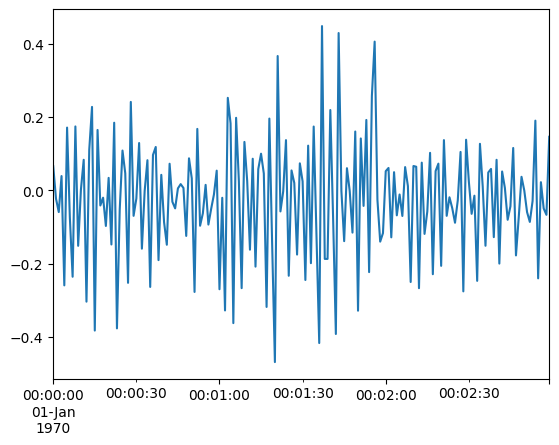

In [36]:
data = load_dataset(data_directory)
data = data.resample('1S').mean().SCG
data[:180].plot()
plt.show()